In [110]:
import openpyxl
from openpyxl.utils import column_index_from_string, get_column_letter

import openpyxl
from openpyxl.utils import column_index_from_string
import openpyxl
import pandas as pd


### Pre-traitement

### Input et Output entrée

#### Output

In [118]:
# Specify the path to your Excel file
excel_file_path = './../Donnees/Databrut.xlsx'

# Load the workbook
workbook = openpyxl.load_workbook(excel_file_path)

# Select the active sheet
sheet = workbook.active

# Specify the column letters you want to select
selected_columns_letters = ["K","O", "P", "Q"]

# Convert letters to column indices
selected_columns_indices = [column_index_from_string(letter) for letter in selected_columns_letters]
# Use the indices to select columns


# Create a dictionary to store the selected columns
stored_data = {}

# Define column names (you can customize these)
column_names = ["Water_out", "Power_out", "Power_in", "COP"]

# Iterate over the selected columns and store data in the dictionary
for col_index, column_name in zip(selected_columns_indices, column_names):
    # Access the column using the column index
    selected_column = sheet[get_column_letter(col_index)]
    # Store column data in the dictionary
    stored_data[column_name] = [cell.value for cell in selected_column]

# Now, 'stored_data' is a dictionary where keys are column names and values are lists of column data

# Close the workbook
workbook.close()

In [119]:
# Convert stored_data to a Pandas DataFrame
df = pd.DataFrame(stored_data)

# Convert the entire DataFrame to numeric values
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Remove rows that contain non-numeric values
df_output = df_numeric.dropna()

# Display the cleaned DataFrame
print(df_output)

     Water_out    Power_out     Power_in       COP
4    35.098729  8628.775284  2022.298343  4.279641
5    35.170939  8589.444308  2044.149171  4.214619
6    35.029724  7641.797307  1748.723757  4.383122
7    35.118453  6873.783742  1477.259669  4.667061
8    35.050442  6035.440249  1248.497238  4.848746
..         ...          ...          ...       ...
129  54.203023  3519.253648  2367.003754  1.486797
130  54.241624  3545.644394  2262.551720  1.567100
131  53.182450  2757.048670  1684.523486  1.636694
132  51.688952  1626.207401  1171.696004  1.387909
133  49.027759   138.371200   735.992197  0.188006

[77 rows x 4 columns]


In [120]:
# export l'ouput en fichier Excel
Outputpath = './../Donnees/Outputdata.xlsx'
df_output.to_excel(Outputpath, index=False)

#### Input

In [155]:
# Specify the path to your Excel file
excel_file_path = './../Donnees/Databrut.xlsx'

# Load the workbook
workbook = openpyxl.load_workbook(excel_file_path)

# Select the active sheet
sheet = workbook.active

# Specify the column letters you want to select
selected_columns_letters = ["I", "J","L"]

# Convert letters to column indices
selected_columns_indices = [column_index_from_string(letter) for letter in selected_columns_letters]

# Use the indices to select columns
selected_columns = sheet.iter_cols(min_col=min(selected_columns_indices), max_col=max(selected_columns_indices), values_only=True)

# Create a dictionary to store the selected columns
stored_data = {}

# Define column names (you can customize these)
column_names =["Frequency", "Water_in", "Flow" ]

# Iterate over the selected columns and store data in the dictionary
for column, column_name in zip(selected_columns, column_names):
    stored_data[column_name] = list(column)

# Now, 'stored_data' is a dictionary where keys are column names

# Close the workbook
workbook.close()

# Ajout de la colonne T_air
NbA12W35,NbA12W45 = 9,9
NbA7W35,NbA7W45,NbA7W55 = 13,12,4
NbA2W35,NbA2W45,NbA2W55  = 5,5,5
NbAmoins7W35,NbAmoins7W45,NbAmoins7W55 = 5,5,5

NbA12 = NbA12W35+NbA12W45
NbA7 = NbA7W35+NbA7W45+NbA7W55
NbA2 = NbA2W35+NbA2W45+NbA2W55
NbAmoins7 = NbAmoins7W35+NbAmoins7W45+NbAmoins7W55

values = [12]*NbA12 + [7]*NbA7 + [2]*NbA2 + [-7]*NbAmoins7


In [158]:
# Convert stored_data to a Pandas DataFrame
df = pd.DataFrame(stored_data)

# Convert the entire DataFrame to numeric values
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Remove rows that contain non-numeric values
df_input = df_numeric.dropna()

# Assign values to the "T_air" column 
df_input['T_air'] = values

# Display the cleaned DataFrame
print(df_input)

     Frequency   Water_in       Flow  T_air
4        105.6  30.112818  35.098729     12
5         98.4  30.139006  35.170939     12
6         88.2  30.081215  35.029724     12
7         78.0  30.209724  35.118453     12
8         68.4  30.096077  35.050442     12
..         ...        ...        ...    ...
129      105.6  49.644142  54.203023     -7
130       88.2  49.644146  54.241624     -7
131       68.4  49.610203  53.182450     -7
132       48.0  49.582365  51.688952     -7
133       28.8  48.848730  49.027759     -7

[77 rows x 4 columns]


/tmp/ipykernel_820/3459895846.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['T_air'] = values


In [157]:
# export l'input en fichier Excel
Inputpath = './../Donnees/Inputdata.xlsx'
df_input.to_excel(Inputpath, index=False)

### Class

In [58]:
# Import the needed (FMPy) packages
from fmpy import dump, read_model_description, extract
from fmpy.fmi2 import FMU2Slave
from fmpy.util import plot_result #, download_test_file
import numpy as np
#import shutil

In [67]:
class CustomSimulator:
    def __init__(self, fmu_path):
        self.fmu_path = fmu_path
        self.model_description = read_model_description(fmu_path)
        self.unzipdir = extract(fmu_path)
        self.modelIdentifier = self.model_description.coSimulation.modelIdentifier
        self.guid = self.model_description.guid
        self.vrs = {
            var.name: var.valueReference for var in self.model_description.modelVariables}
        
        self.input_variables = [
        var for var in self.model_description.modelVariables if var.causality == 'input']

    def simulate(self,Frequency,Water_in,Flow,T_air):
        start_time = 0.0
        stop_time = 1500.0
        step_size = 1

        fmu = FMU2Slave(guid=self.guid, unzipDirectory=self.unzipdir,
                        modelIdentifier=self.modelIdentifier, instanceName='instance1')

        fmu.instantiate()

        start_values = {
            'u_compressorFrequency': 88.2,     # Hz
            'u_VFlow': 1.33 / 3600,            # m3/s
            'u_T_watrer_in': 303.15,           # K
            'u_T_air': 285.15,                 # K

            'x_areaLeakage': 5e-7,             # m², valeur dans [1e-8 ; 1e-6]
            'x_areaSuctionValve': 5e-4,        # m², valeur dans [2e-6 ; 1e-3]
            'x_areaDischargeValve': 5e-5,      # m², valeur dans [1e-4 ; 1e-7]
            'x_relativeDeadSpace': 0.05,       # valeur dans [0.001 ; 0.1]
            'x_driveEfficiency': 0.9           # valeur dans [0.85 ; 0.98]
        }

        start_values['u_compressorFrequency'] = Frequency
        start_values['u_VFlow'] = Flow
        start_values['u_T_watrer_in'] = Water_in
        start_values['u_T_air'] = T_air
 

        fmu.setupExperiment(startTime=start_time)


        for var_name, start_value in start_values.items():
            fmu.setReal([self.vrs[var_name]], [start_value])


        fmu.enterInitializationMode()
        fmu.exitInitializationMode()


        # print('Simulating...')
        time = np.arange(start_time, stop_time, step_size)
        result = []

        for t in time:
            fmu.doStep(currentCommunicationPoint=t,
                    communicationStepSize=step_size)
            
            # Retrieve the outputs
            COP_Freq, Power_in, Power_out,Water_out = fmu.getReal(
                [self.vrs['y_COP'], self.vrs['y_heatPower'], self.vrs['y_elecPower'], self.vrs['y_T_out']])
            result.append((t, COP_Freq, Power_in, Power_out,Water_out))

        fmu.terminate()
        fmu.freeInstance()

        result = np.array(result, dtype=np.dtype([('time', np.float64), (
            'y_COP', np.float64), ('Power_in', np.float64), ('Power_out', np.float64)]))

        return result

    def run_simulations(self, inputs):
        for index, row in inputs.iterrows():
            self.simulate(Frequency=row['Frequency'], Water_in=row['Water_in'],
                          Flow=row['Flow'],T_air=row['T_air'])


In [169]:
# Assuming df is a DataFrame with simulation parameters
simulator = CustomSimulator('HPFMU_20_Linux.fmu')

Frequency,Water_in,Flow,T_air  = df_input.iloc[0, :]
result = simulator.simulate(Frequency,Water_in,Flow,T_air)
# result[-1]

# simulator.run_simulations(df_input)

TypeError: CustomSimulator.simulate() takes 1 positional argument but 5 were given

In [25]:
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
from pymoo.algorithms.moo.nsga2 import NSGA2
import numpy as np
import pandas as pd
from fmpy import read_model_description, extract
from fmpy.fmi2 import FMU2Slave
from fmpy.util import plot_result

In [26]:
class CustomSimulator:
    def __init__(self, fmu_path):
        self.fmu_path = fmu_path
        self.model_description = read_model_description(fmu_path)
        self.unzipdir = extract(fmu_path)
        self.modelIdentifier = self.model_description.coSimulation.modelIdentifier
        self.guid = self.model_description.guid
        self.vrs = {
            var.name: var.valueReference for var in self.model_description.modelVariables}

    def simulate(self, time, frequency, tair, twater, Qwater, show_plot=False):
        start_time = 0.0
        stop_time = 600
        step_size = 1

        fmu = FMU2Slave(guid=self.guid, unzipDirectory=self.unzipdir,
                        modelIdentifier=self.modelIdentifier, instanceName='instance1')

        fmu.instantiate()
        fmu.setupExperiment(startTime=start_time)
        fmu.enterInitializationMode()
        fmu.exitInitializationMode()

        # Set initial values based on the parameters
        fmu.setReal([self.vrs['Frequency']], [frequency])
        fmu.setReal([self.vrs['Temperature_cold_source']], [tair])
        # Add other parameters as needed

        time = start_time
        rows = []

        while time < stop_time:
            # Update the inputs at each step if necessary
            fmu.setReal([self.vrs['Frequency']], [frequency])
            fmu.setReal([self.vrs['Temperature_cold_source']], [tair])

            fmu.doStep(currentCommunicationPoint=time,
                       communicationStepSize=step_size)
            # Retrieve the outputs
            Comp_Freq, Air_Ext_T, HP_Heat = fmu.getReal(
                [self.vrs['Frequency'], self.vrs['Temperature_cold_source'], self.vrs['Power']])
            rows.append((time, Comp_Freq, Air_Ext_T, HP_Heat))
            time += step_size

        fmu.terminate()
        fmu.freeInstance()

        result = np.array(rows, dtype=np.dtype([('time', np.float64), (
            'Comp_Frequency', np.float64), ('Air_Ext_T', np.float64), ('HP_Heat', np.float64)]))

        if show_plot:
            plot_result(result)

    def run_simulations(self, dataframe):
        for index, row in dataframe.iterrows():
            self.simulate(time=row['Time[s]'], frequency=row['Frequ[Hz]'],
                          tair=row['Tair[°C]'], twater=row['Twaterin[°C]'], Qwater=row['Qwater[m3/s]'])


In [27]:
# Assuming df is a DataFrame with simulation parameters
simulator = CustomSimulator('PAC_0test1_DymolaSolver.fmu')
simulator.run_simulations(df_input)

Exception: Cannot find shared library /tmp/tmps5nxlnz_/binaries/linux64/PAC_0test1_DymolaSolver.so.

In [28]:
class CustomSimulator:
    def __init__(self, fmu_path):
        self.fmu_path = fmu_path
        self.model_description = read_model_description(fmu_path)
        self.unzipdir = extract(fmu_path)
        self.modelIdentifier = self.model_description.coSimulation.modelIdentifier
        self.guid = self.model_description.guid
        self.vrs = {
            var.name: var.valueReference for var in self.model_description.modelVariables}

    def simulate(self, time, frequency, tair, twater, Qwater, show_plot=False):
        start_time = 0.0
        stop_time = 600
        step_size = 1

        fmu = FMU2Slave(guid=self.guid, unzipDirectory=self.unzipdir,
                        modelIdentifier=self.modelIdentifier, instanceName='instance1')

        fmu.instantiate()
        fmu.setupExperiment(startTime=start_time)
        fmu.enterInitializationMode()
        fmu.exitInitializationMode()

        # Set initial values based on the parameters
        fmu.setReal([self.vrs['Frequency']], [frequency])
        fmu.setReal([self.vrs['Temperature_cold_source']], [tair])
        # Add other parameters as needed

        time = start_time
        rows = []

        while time < stop_time:
            # Update the inputs at each step if necessary
            fmu.setReal([self.vrs['Frequency']], [frequency])
            fmu.setReal([self.vrs['Temperature_cold_source']], [tair])

            fmu.doStep(currentCommunicationPoint=time,
                       communicationStepSize=step_size)
            # Retrieve the outputs
            Comp_Freq, Air_Ext_T, HP_Heat = fmu.getReal(
                [self.vrs['Frequency'], self.vrs['Temperature_cold_source'], self.vrs['Power']])
            rows.append((time, Comp_Freq, Air_Ext_T, HP_Heat))
            time += step_size

        fmu.terminate()
        fmu.freeInstance()

        result = np.array(rows, dtype=np.dtype([('time', np.float64), (
            'Comp_Frequency', np.float64), ('Air_Ext_T', np.float64), ('HP_Heat', np.float64)]))

        if show_plot:
            plot_result(result)

    def run_simulations(self, dataframe):
        for index, row in dataframe.iterrows():
            self.simulate(time=row['Time[s]'], frequency=row['Frequ[Hz]'],
                          tair=row['Tair[°C]'], twater=row['Twaterin[°C]'], Qwater=row['Qwater[m3/s]'])

In [29]:
# Assuming df is a DataFrame with simulation parameters
simulator = CustomSimulator('HPFMU_20_Win.fmu')
simulator.run_simulations(df_input)

FileNotFoundError: [Errno 2] No such file or directory: 'HPFMU_20_Win.fmu'

In [ ]:
import numpy as np
from deap import base, creator, tools, algorithms

# Définition du problème d'optimisation
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMulti)

def evaluate(individual):
    # Extrait les paramètres de l'individu
    time, frequency, tair, twater, Qwater = individual

    # Initialise le simulateur
    simulator = CustomSimulator(fmu_path="chemin_vers_votre_fmu.fmu")

    # Exécute la simulation
    simulator.simulate(time, frequency, tair, twater, Qwater)

    # À adapter : définir les critères à optimiser
    # Dans cet exemple, on suppose que la fonction objectif est à minimiser
    criterion1 = ...  # Exemple : différence entre une valeur cible et Comp_Frequency
    criterion2 = ...  # Exemple : différence entre une valeur cible et Air_Ext_T
    criterion3 = ...  # Exemple : maximiser HP_Heat

    return criterion1, criterion2, criterion3

toolbox = base.Toolbox()
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (TIME_RANGE, FREQUENCY_RANGE, TAIR_RANGE, TWATER_RANGE, QWATER_RANGE), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

# À adapter : paramètres de l'algorithme génétique
population_size = 50
num_generations = 50

# Générer la population initiale
population = toolbox.population(n=population_size)

# Exécuter l'algorithme génétique
algorithms.eaMuPlusLambda(population, toolbox, mu=population_size, lambda_=population_size, cxpb=0.7, mutpb=0.2, ngen=num_generations, stats=None, halloffame=None)

# À adapter : récupérer les solutions non-dominées
front = tools.sortNondominated(population, len(population), first_front_only=True)[0]

# Afficher les solutions non-dominées
for ind in front:
    print(ind.fitness.values)


NameError: name 'YOUR_TIME_RANGE' is not defined

In [ ]:
import numpy as np
# from pymoo.model.problem import Problem
from pymoo.algorithms.moo.rnsga2 import RNSGA2
from pymoo.optimize import minimize

# Définir votre propre problème d'optimisation
class MyProblem(Problem):
    def __init__(self):
        super().__init__(n_var=2, n_obj=2, n_constr=0, xl=np.array([0, 0]), xu=np.array([5, 5]))

    def _evaluate(self, x, out, *args, **kwargs):
        # Définir la fonction objectif
        f1 = x[0]**2 + x[1]**2
        f2 = (x[0] - 1)**2 + x[1]**2

        # Assigner les valeurs objectif
        out["F"] = [f1, f2]

# Choisir l'algorithme d'optimisation multi-objectif (NSGA-II dans cet exemple)
algorithm = NSGA2(pop_size=100)

# Créer une instance de votre problème
problem = MyProblem()

# Exécuter l'optimisation
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               verbose=True)

# Afficher les résultats
print("Meilleures solutions trouvées:")
for solution in res.X:
    print(solution)


NameError: name 'Problem' is not defined

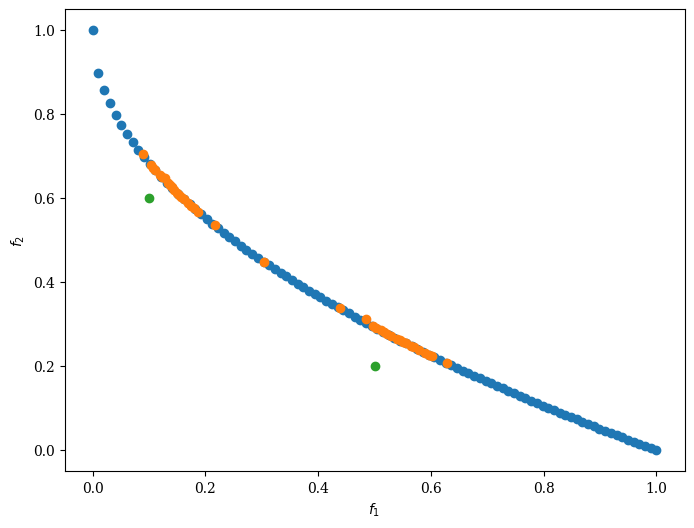

In [ ]:
import numpy as np

from pymoo.algorithms.moo.rnsga2 import RNSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt1", n_var=30)
pf = problem.pareto_front()

# Define reference points
ref_points = np.array([[0.5, 0.2], [0.1, 0.6]])

# Get Algorithm
algorithm = RNSGA2(
    ref_points=ref_points,
    pop_size=40,
    epsilon=0.01,
    normalization='front',
    extreme_points_as_reference_points=False,
    weights=np.array([0.5, 0.5]))

res = minimize(problem,
               algorithm,
               save_history=True,
               termination=('n_gen', 250),
               seed=1,
               pf=pf,
               disp=False)


Scatter().add(pf, label="pf").add(res.F, label="F").add(ref_points, label="ref_points").show()